# Stability and Stiffness

In the past when you've talked about **stability**, it has likely been regarding the stability of a *system*. Stable systems are those will well-behaved exact solutions, meaning they do not grow unbounded.
In engineering we mostly focus (or want!) stable systems, although there are some interesting unstable systems such as those involving resonance, nonlinear dynamics, or chaos—generally we want to know when that happens so we can prevent it.

We can also define the stability of a *numerical scheme*, which is when the numerical solution exhibits unphysical behavior. In other words, it blows up.

For example, let's consider the relatively simple 1st-order ODE
\begin{equation}
\frac{dy}{dt} = -3 y
\end{equation}
with the initial condition $y(0) = 1$. As we will see, this ODE can cause explicit numerical schemes to become unstable, and thus it is a **stiff** ODE.

Let's try solving this with the Forward Euler method, integrating over $0 \leq t \leq 10$, for a range of time-step size values: $\Delta t = 0.1, 0.25, 0.5, 0.75$:

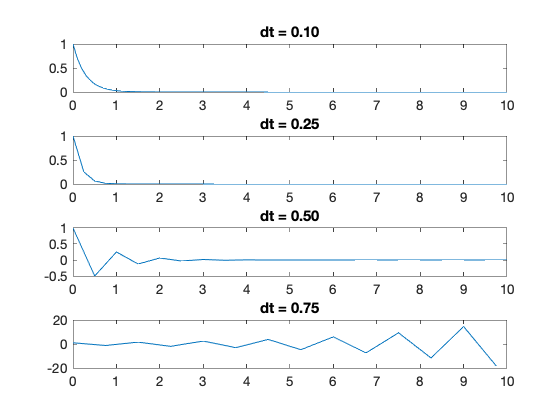

In [4]:
f = @(t,y) -3*y;

dt = 0.1;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,1);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.25;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,2);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.5;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,3);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.75;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,4);
plot(t, y); title(sprintf('dt = %4.2f', dt));

For this (stiff) problem, we see error, related to instability, **much** larger than what we should get based on the method's order of accuracy (first) and the step size.

Compare this behavior to that for the ODE
\begin{equation}
\frac{dy}{dt} = e^{-t}
\end{equation}
which is **non-stiff**:

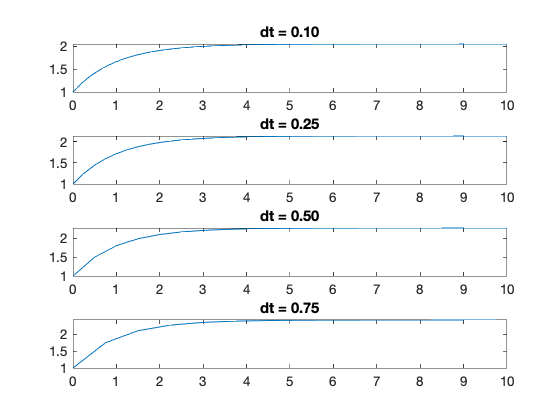

In [7]:
f = @(t,y) exp(-t);

dt = 0.1;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,1);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.25;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,2);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.5;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,3);
plot(t, y); title(sprintf('dt = %4.2f', dt));

dt = 0.75;
t = 0 : dt : 10;
y = zeros(length(t), 1);
y(1) = 1;
for i = 1 : length(t) - 1
    y(i+1) = y(i) + dt*f(t(i), y(i));
end
subplot(4,1,4);
plot(t, y); title(sprintf('dt = %4.2f', dt));

In this case, we see that the solution remains well-behaved even for larger time-step sizes, and the error matches the expected order based on the method and step-size value.

In general numerical schemes can be:

- **unstable**: the scheme blows up for any choice of parameters
- **conditionally stable**: the scheme is stable for a particular choice of parameters (for example, $\Delta t$ is less than some threshold
- **unconditionally stable**: the scheme is always stable

Schemes may be stable for some problem/system and not for another, and vice versa.

Stability is related to robustness of a method, which is generally a tradeoff between complexity and computational cost. The choice of method and solution strategy depends on waht you want, and how long you can wait for it. In general, we almost always want to use the largest $\Delta t$ allowable.

## Stability analysis

We can perform a stability analysis of the stiff problem to identify when the Forward Euler method becomes unstable. Let's apply the method to the ODE at hand:
\begin{align}
\frac{dy}{dt} &= -3 y \\
y_{i+1} &= y_i + \Delta t f(t_i, y_i) \\
y_{i+1} &= y_i + \Delta t (-3 y_i) \\
 &= y_i (1 - 3 \Delta t) \\
\frac{y_{i+1}}{y_i} &= \sigma = 1 - 3 \Delta t 
\end{align}
where $\sigma$ is the **amplification factor**. This defines whether the solution grows or decays each step—for a stable physical system, we expect the solution to get smaller or remain contant with each step.

Therefore, for the method to remain stable, we must have $\sigma | \leq 1$. We can use this stability criterion to find conditions on $\Delta t$ for stability:
\begin{gather}
| \sigma | = | 1 - 3 \Delta t | \leq 1 \\
-1 \leq 1 - 3 \Delta t \leq 1 \\
-1 \leq 1 - 3 \Delta t \quad \text{or} \quad 1 - 3 \Delta t \leq 1 \\
\frac{-2}{3} \leq -\Delta t \quad \quad -\Delta t \leq 0 \\
\rightarrow \Delta t \leq \frac{2}{3} \quad \text{and} \quad \Delta t \geq 0 \\
\therefore 0 \leq \Delta t \leq \frac{2}{3}
\end{gather}
for stability. (For safety, we might use $\Delta t < 1/2$ for safety, to stay away from the absolute stability limit.)

The Forward Euler method is then *conditionally stable*. 

As a general rule of thumb, all **explicit** methods are conditionally stable; these are methods where the recursion formula for $y_{i+1}$ can be written and calculated explicitly in terms of known quantities.

## Backward Euler method

